In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

#as we have Max column 
pd.set_option('display.max_columns',None)


In [2]:
df=pd.read_csv('C:\\Users\\LENOVO\\Downloads\HR.csv')

# EDA

In [3]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [4]:
#checking shape of the columns
df.shape

(1470, 35)

Observation:we have many numbers for columns

In [5]:
#checking dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

Here we can see Over18, StandardHours, EmployeeCount are having only one value in data set

EmployeeNumber is having unique data 

all mentioned columns we can ignore as it will not provide the useful information that model can learn

# checking data Discription

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Obervation:
    
    1)No null values are present.
    
    2)Std dev is high in every columns means we can say skewness and outliers are present.
    
 

# checking null values

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The data is not Null

<AxesSubplot:>

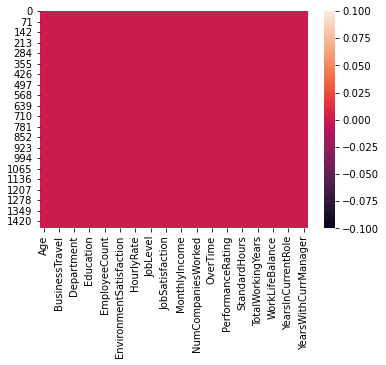

In [9]:
sns.heatmap(df.isnull())

checking Not Null data with Heatmap

# checking target variable by plotting countplot

<AxesSubplot:>

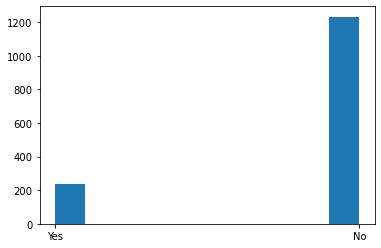

In [10]:
df['Attrition'].hist(grid=False)

here we clearly see yes:237 and NO:1233 so the data is imbalanced so we can balanced the data by SMOTE technique

# checking correlation

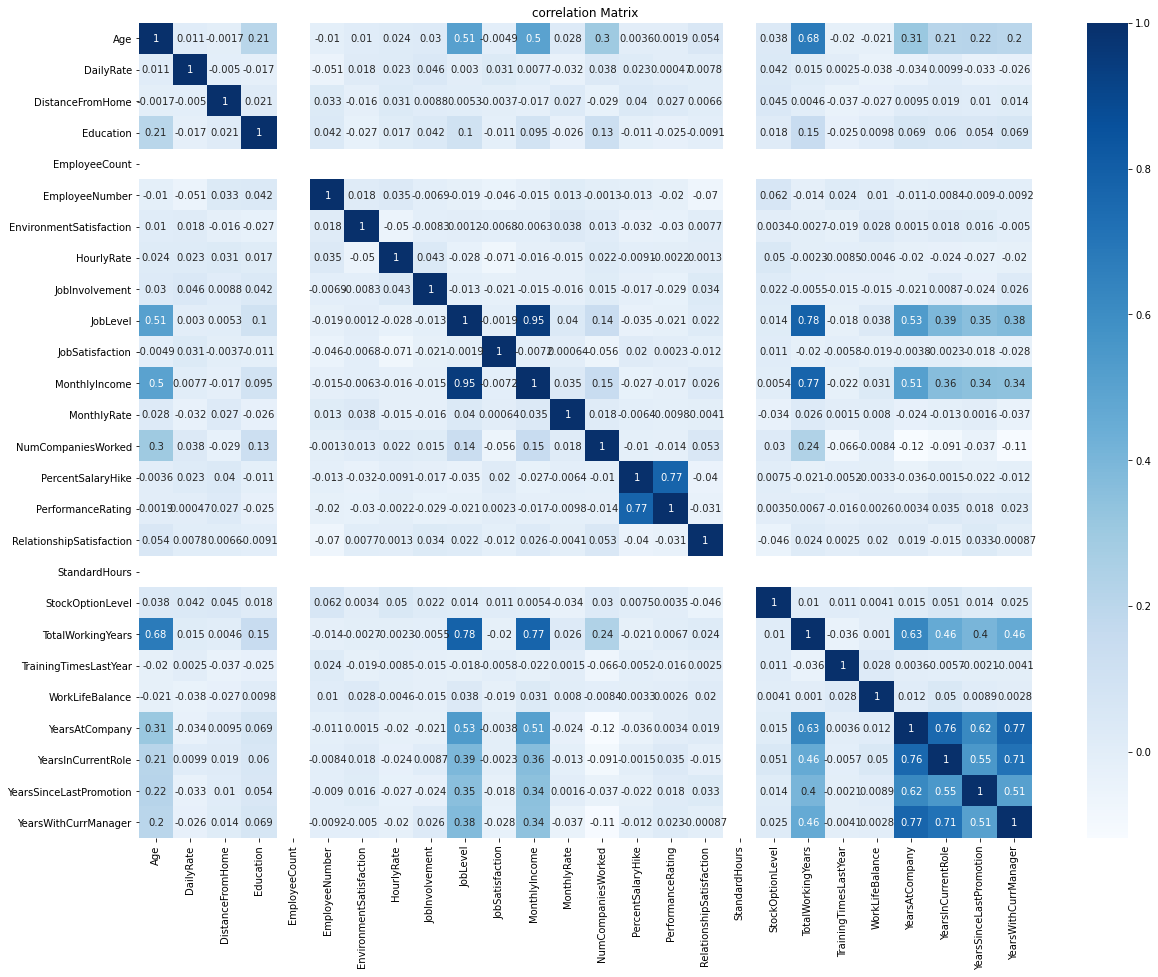

In [11]:
corr_mat=df.corr()#----------------> corelation function

plt.figure(figsize=[20,15])#-------> figure size dimetions
sns.heatmap(corr_mat,annot=True,cmap="Blues")#--> annot = true means will print values
plt.title("correlation Matrix")#---> title
plt.show()

as observerd above mentioned columns are not participiting well with prediction hence we will drop those columns

# Dropping  unwanted columns

In [12]:
df.drop(columns=['StandardHours','EmployeeCount','EmployeeNumber','Over18'],axis=1,inplace=True)

In [13]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


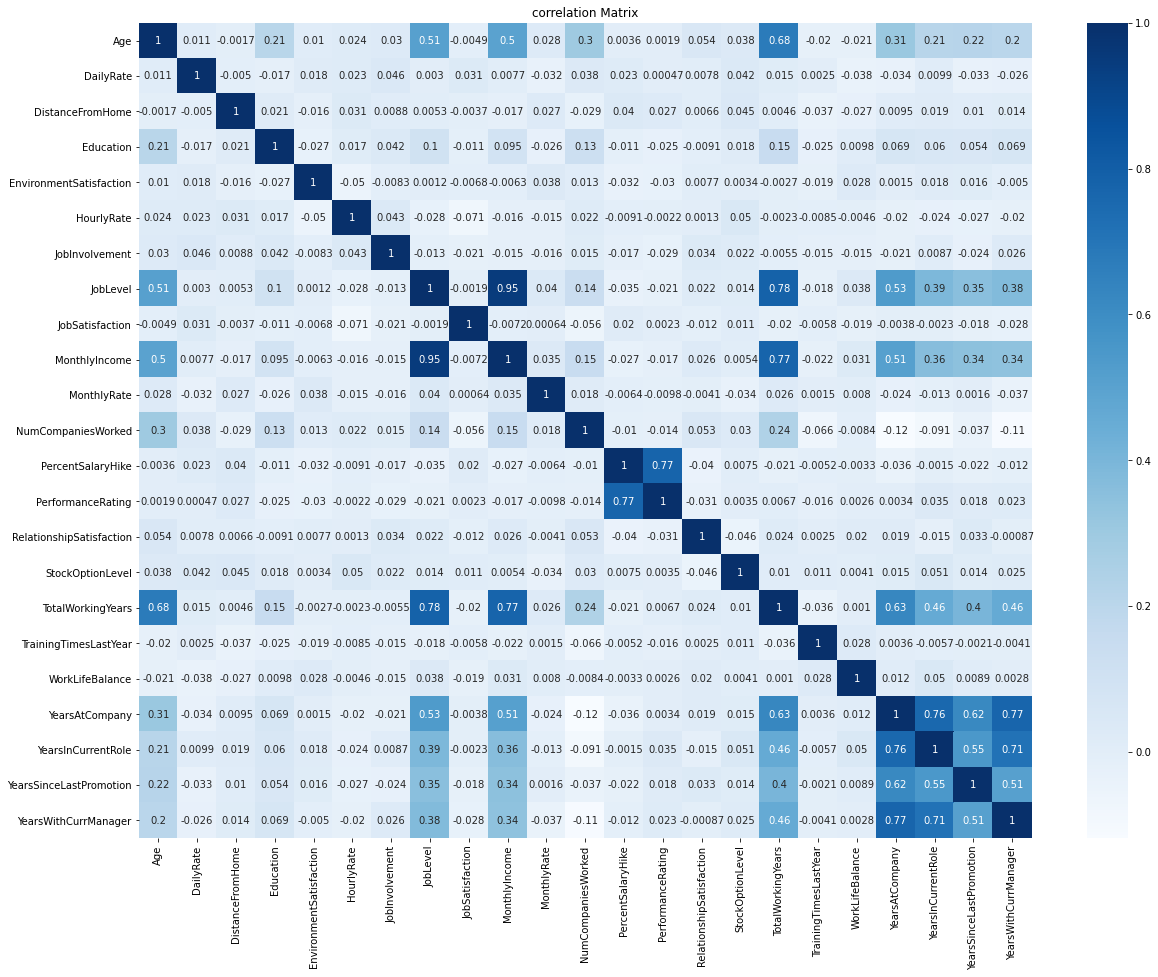

In [14]:
corr_mat=df.corr()#----------------> corelation function

plt.figure(figsize=[20,15])#-------> figure size dimetions
sns.heatmap(corr_mat,annot=True,cmap="Blues")#--> annot = true means will print values
plt.title("correlation Matrix")#---> title
plt.show()

# checking correlationship again after droping columns

Now as we know we have objects columns so we will convert those columns in numeric for better prediction using Label encoder

# Transformation Techniques to convert data in numeric

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# Encode categorical features by using for loop 
for col in df.columns:
    if df[col].dtype == np.number:
        continue
    df[col] = LabelEncoder().fit_transform(df[col])

In [17]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,11,3,1,2,3,1,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,12,1,2,0,0,1,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,57,3,1,4,1,1,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,33,1,1,7,1,1,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

Now we can see all columns are numeric after applying Label Encoder

# checking correlation with Attrition output column

In [21]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
corr_mat['Attrition'].sort_values(ascending=False)

Observation: we can see highest positive column is over time and lowest column si sMonthly Income but the range is almost near to 0 that is 0.24 and -0.19 so we can say that the input data are not highly positive or negative to the output column
    
    

# Data Distribution with graph

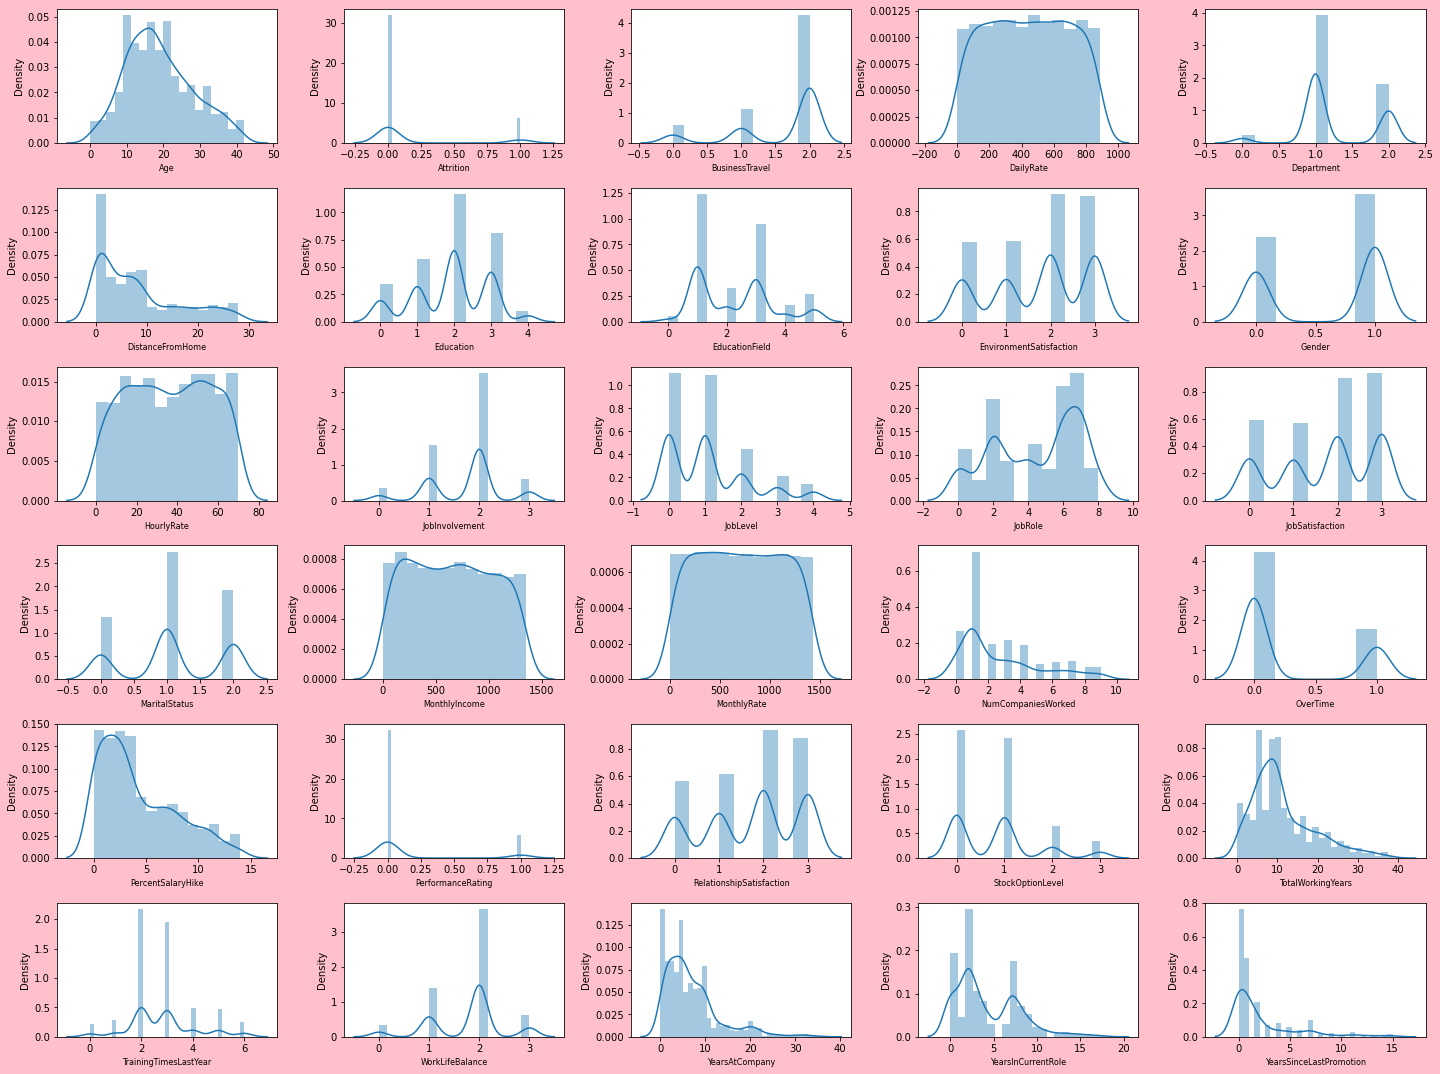

In [28]:
plt.figure(figsize=(20,15),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=30:
        ax = plt.subplot(6,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

Here many columns we can see are not normalised. Skeness are present in almost all columns

# checking and removing Outliers 

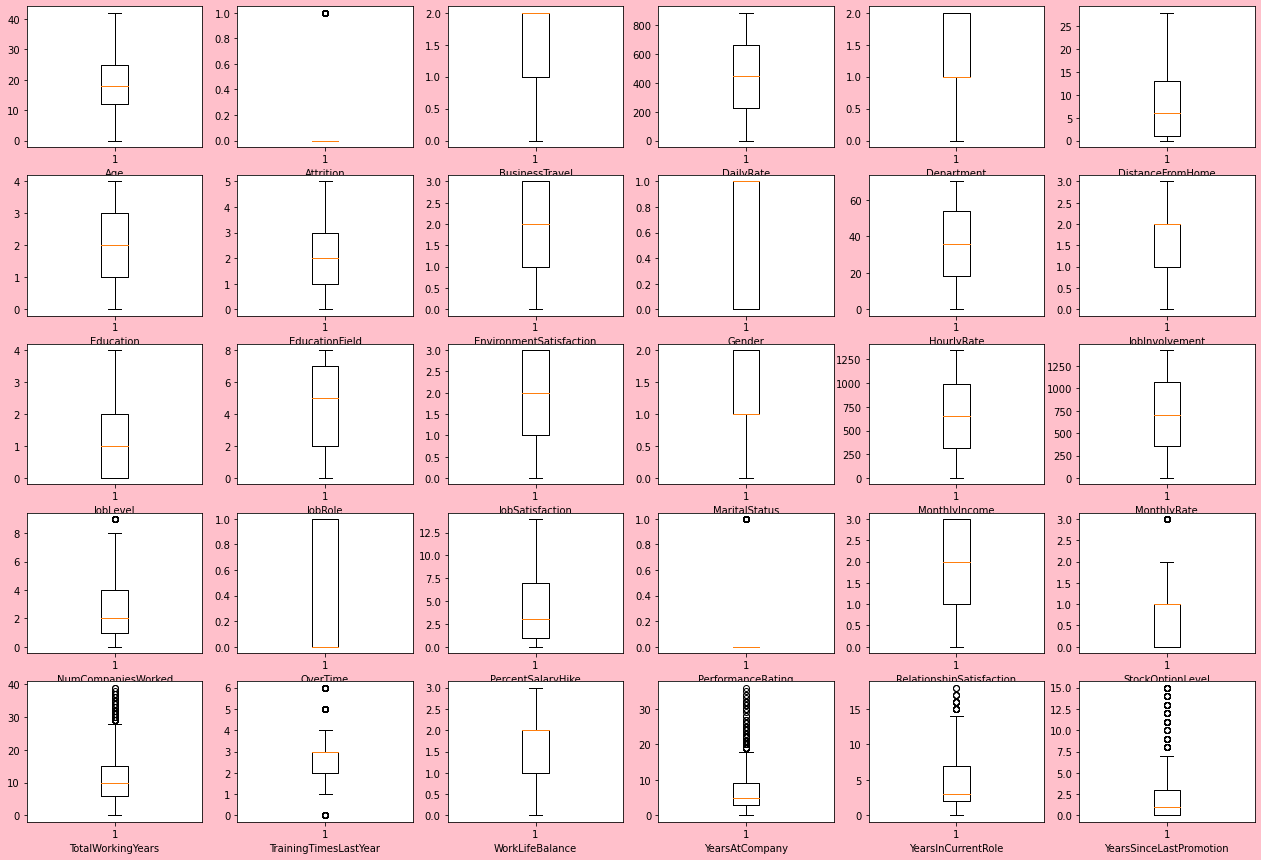

In [29]:
#checking one more time
plt.figure(figsize=(22,15),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=30:
        ax=plt.subplot(5,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

here we can see in NumCompaniesWorked,performance rating ,StockOptionLevel,total working years,training times last year,years at company,years in current role,yearssince last promotion columns having the outliers

# Removing the outliers by zscore method

In [30]:
from scipy.stats import zscore

In [31]:
z=np.abs(zscore(df))
z

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [32]:
threshold=3
print(np.where(z>3))


(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [33]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,11,3,1,2,3,1,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,12,1,2,0,0,1,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,57,3,1,4,1,1,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,33,1,1,7,1,1,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8


# Seperation of Input and Output Columns

In [73]:
X=df_new.drop('Attrition',axis=1) # features
y=df_new.Attrition                 # label

# Checking skewness 

In [74]:
X.skew().sort_values(ascending=False)

PerformanceRating           1.931566
YearsSinceLastPromotion     1.756335
YearsAtCompany              1.248623
JobLevel                    1.126075
NumCompaniesWorked          1.037715
TotalWorkingYears           1.034487
StockOptionLevel            0.962332
DistanceFromHome            0.954752
OverTime                    0.954751
PercentSalaryHike           0.800592
YearsInCurrentRole          0.726675
YearsWithCurrManager        0.694506
TrainingTimesLastYear       0.577614
EducationField              0.544868
Age                         0.472280
Department                  0.183919
MonthlyIncome               0.112326
MonthlyRate                 0.024344
DailyRate                  -0.012403
HourlyRate                 -0.030481
MaritalStatus              -0.160952
Education                  -0.289024
RelationshipSatisfaction   -0.295686
EnvironmentSatisfaction    -0.325285
JobSatisfaction            -0.345612
JobRole                    -0.386843
Gender                     -0.417296
J

here we can see skewness is present in multiple columns which is not in the range of +-0.5 hence we need to apply Power transform technique to remove all skewness from input variable

# Using Power_transform method to remove the skewness

In [75]:
from sklearn.preprocessing import power_transform

In [76]:
x_new=power_transform(X)

In [77]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

20    1.931566
18    0.954751
28    0.212301
22    0.089929
11    0.067551
24    0.057949
17    0.016175
3     0.015095
6    -0.008642
23   -0.009666
0    -0.016840
26   -0.025230
25   -0.037356
10   -0.044790
19   -0.053027
4    -0.060966
27   -0.069631
29   -0.070570
5    -0.150667
14   -0.158253
21   -0.248323
15   -0.253056
7    -0.263063
9    -0.263117
16   -0.269784
13   -0.275767
2    -0.284354
12   -0.337641
8    -0.417296
1    -0.960583
dtype: float64

In [78]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

PerformanceRating           1.931566
OverTime                    0.954751
YearsSinceLastPromotion     0.212301
StockOptionLevel            0.089929
JobLevel                    0.067551
TrainingTimesLastYear       0.057949
NumCompaniesWorked          0.016175
Department                  0.015095
EducationField             -0.008642
TotalWorkingYears          -0.009666
Age                        -0.016840
YearsAtCompany             -0.025230
WorkLifeBalance            -0.037356
JobInvolvement             -0.044790
PercentSalaryHike          -0.053027
DistanceFromHome           -0.060966
YearsInCurrentRole         -0.069631
YearsWithCurrManager       -0.070570
Education                  -0.150667
MaritalStatus              -0.158253
RelationshipSatisfaction   -0.248323
MonthlyIncome              -0.253056
EnvironmentSatisfaction    -0.263063
HourlyRate                 -0.263117
MonthlyRate                -0.269784
JobSatisfaction            -0.275767
DailyRate                  -0.284354
J

In [106]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

PerformanceRating           1.921883
OverTime                    0.964489
YearsSinceLastPromotion     0.212129
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
JobLevel                    0.057017
NumCompaniesWorked          0.014814
Department                  0.013801
EducationField             -0.008386
YearsAtCompany             -0.009847
TotalWorkingYears          -0.010839
Age                        -0.031035
WorkLifeBalance            -0.038587
JobInvolvement             -0.046711
PercentSalaryHike          -0.050437
DistanceFromHome           -0.060046
YearsInCurrentRole         -0.060849
YearsWithCurrManager       -0.067565
Education                  -0.146061
MaritalStatus              -0.156911
RelationshipSatisfaction   -0.250323
EnvironmentSatisfaction    -0.263120
HourlyRate                 -0.264831
MonthlyIncome              -0.268411
JobSatisfaction            -0.270850
DailyRate                  -0.279407
MonthlyRate                -0.285494
J

In [79]:
x1=pd.DataFrame(x_new,columns=X.columns)

In [80]:
x1.skew().sort_values(ascending=False)

PerformanceRating           1.931566
OverTime                    0.954751
YearsSinceLastPromotion     0.212301
StockOptionLevel            0.089929
JobLevel                    0.067551
TrainingTimesLastYear       0.057949
NumCompaniesWorked          0.016175
Department                  0.015095
EducationField             -0.008642
TotalWorkingYears          -0.009666
Age                        -0.016840
YearsAtCompany             -0.025230
WorkLifeBalance            -0.037356
JobInvolvement             -0.044790
PercentSalaryHike          -0.053027
DistanceFromHome           -0.060966
YearsInCurrentRole         -0.069631
YearsWithCurrManager       -0.070570
Education                  -0.150667
MaritalStatus              -0.158253
RelationshipSatisfaction   -0.248323
MonthlyIncome              -0.253056
EnvironmentSatisfaction    -0.263063
HourlyRate                 -0.263117
MonthlyRate                -0.269784
JobSatisfaction            -0.275767
DailyRate                  -0.284354
J

After power Transform we can see BusinessTravel,OverTime and PerformanceRating skwness is still there so we will handle this seperatly

In [81]:
sk=x1.skew()

In [82]:
sk[np.abs(sk)>0.5]


BusinessTravel      -0.960583
OverTime             0.954751
PerformanceRating    1.931566
dtype: float64

In [83]:
x1.skew()[np.abs(x1.skew())<0.5].all()

True

In [84]:
x1.skew().sort_values(ascending=False)

PerformanceRating           1.931566
OverTime                    0.954751
YearsSinceLastPromotion     0.212301
StockOptionLevel            0.089929
JobLevel                    0.067551
TrainingTimesLastYear       0.057949
NumCompaniesWorked          0.016175
Department                  0.015095
EducationField             -0.008642
TotalWorkingYears          -0.009666
Age                        -0.016840
YearsAtCompany             -0.025230
WorkLifeBalance            -0.037356
JobInvolvement             -0.044790
PercentSalaryHike          -0.053027
DistanceFromHome           -0.060966
YearsInCurrentRole         -0.069631
YearsWithCurrManager       -0.070570
Education                  -0.150667
MaritalStatus              -0.158253
RelationshipSatisfaction   -0.248323
MonthlyIncome              -0.253056
EnvironmentSatisfaction    -0.263063
HourlyRate                 -0.263117
MonthlyRate                -0.269784
JobSatisfaction            -0.275767
DailyRate                  -0.284354
J

Still the skwness for three columns has been not remove hence we will apply Box cox method

# Boxcox Method

<AxesSubplot:ylabel='Frequency'>

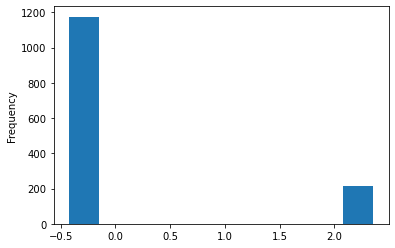

In [85]:
x1['PerformanceRating'].plot.hist()

In [ ]:
from scipy.stats import boxcox
x1['PerformanceRating']= boxcox(x1['PerformanceRating'],0)

Here we can see the BoxCOx requires the positive data and from graph we can see most of the part is in negative side

<AxesSubplot:ylabel='Frequency'>

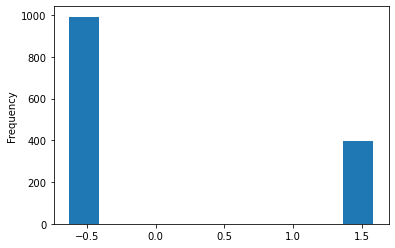

In [86]:
x1['OverTime'].plot.hist()

In [ ]:
from scipy.stats import boxcox
x1['OverTime']= boxcox(x1['OverTime'],0)

Here we can see the BoxCOx requires the positive data and from graph we can see most of the part is in negative side

<AxesSubplot:ylabel='Frequency'>

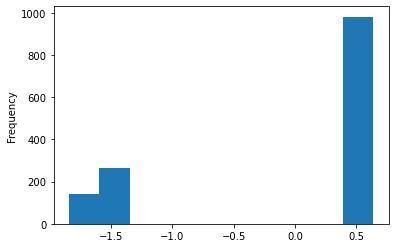

In [54]:
x1['BusinessTravel'].plot.hist()

In [ ]:
from scipy.stats import boxcox
x1['BusinessTravel']= boxcox(x1['BusinessTravel'],0)

Here we can see the BoxCOx requires the positive data and from graph we can see most of the part is in negative side

# Checking Unbalance Data

we must check the data count with respect to output columns as it is unbalanced data or not

if the data is unbalanced then it is difficult to learn data for model

In [99]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Here we can see the 0 output is having 1158 data and 1 is having only 229 hence we can see the data is unbalanced.

To overcome this issuue we need to use SMOTE technique which will add rows in 1 output by making small changes so that the data will be balanced and model can learn well for prediction

# Using SMOTE

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smt=SMOTE()


In [90]:
trainx,trainy=smt.fit_resample(x1,y)

In [91]:
trainx.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.594757,0.638730,0.726329,1.379881,-1.540425,-0.899027,-0.965129,-0.691543,-1.229911,1.305716,0.327444,0.372111,1.017588,1.166957,1.231767,0.557960,0.735317,1.620671,1.584737,-1.624771,-0.424765,-1.552370,-1.084263,-0.173231,-2.608524,-2.152206,0.231837,0.290524,-1.073534,0.582177
1,1.366338,-1.380776,-1.348018,-0.473500,0.253537,-1.781221,-0.965129,0.228695,0.813067,-0.151304,-1.070988,0.372111,0.596961,-0.704103,-0.142549,0.261334,1.392352,-0.561880,-0.631019,1.650829,2.354241,1.215498,0.548653,0.147620,0.217074,0.280173,0.948319,1.006575,0.193168,1.018073
2,0.172771,0.638730,1.320068,-0.473500,-1.001294,-0.899027,1.239552,1.190375,0.813067,1.223844,-1.070988,-1.150905,-1.022696,0.207526,1.231767,-1.727094,-2.045907,1.273711,1.584737,0.228137,-0.424765,-0.670166,-1.084263,-0.351153,0.217074,0.280173,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.282470,-1.380776,1.367537,-0.473500,-0.659936,1.097612,-0.965129,1.190375,-1.229911,-0.399824,0.327444,-1.150905,0.596961,0.207526,-0.142549,-0.741106,1.198341,-0.561880,1.584737,-1.624771,-0.424765,0.257322,-1.084263,-0.173231,0.217074,0.280173,0.621429,1.006575,1.027520,-1.528426
4,-1.057071,0.638730,-0.428653,-0.473500,-1.001294,-1.781221,0.689982,-1.551541,0.813067,-1.296053,0.327444,-1.150905,-1.022696,-0.704103,-0.142549,-0.481355,0.408345,1.764103,-0.631019,-0.900185,-0.424765,1.215498,0.548653,-0.544046,0.217074,0.280173,-0.933983,-0.390769,0.722874,-0.347871


In [96]:
trainy.value_counts()

0    1158
1    1158
Name: Attrition, dtype: int64

Here we can see the Row numbers for 0 and 1 are now equal with SMOTE TEchnique hence now model can predict well

In [101]:
X=trainx
y=trainy

In [102]:
X.shape

(2316, 30)

In [103]:
y.shape

(2316,)

With Balance data we can move ahead 

# Using PCA technique for selecting  the best features

In [118]:
from sklearn.decomposition import PCA

In [119]:
pca=PCA(n_components=6)

In [120]:
xpca=pca.fit_transform(X)

In [121]:
X=xpca

In [122]:
pd.DataFrame(data=X)

,0,1,2,3,4,5
0,1.055199,-1.237297,-1.960017,-1.136169,-1.122866,-1.710170
1,2.014440,-0.047650,1.139883,2.852231,0.384185,0.854525
2,-2.978831,1.320072,-0.571564,-0.087565,-1.341803,-1.158317
3,-0.035454,-0.995051,0.916530,-1.142459,0.102785,-1.217823
4,-0.882293,1.194325,0.517909,-1.488593,-0.110688,0.731690
...,...,...,...,...,...,...
2311,-2.133610,0.634095,-0.607376,2.983027,-1.749521,1.454601
2312,-4.027890,0.282702,0.129705,-1.404236,-1.559565,0.506537
2313,-0.885224,1.263938,0.514145,0.693725,-1.799506,-1.564218
2314,-1.658139,-0.403236,1.253757,3.178167,0.598437,-0.676550


This technique mainly used when we have higher numbers of dataset to select the best features

here we can select the best 6 features 

# RandomForest Classier - 91.39%

In [123]:
#To get best Test size number from 1 to 40%
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
#dt=DecisionTreeClassifier()
#lr=LogisticRegression()
rf=RandomForestClassifier()
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=i1)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8663793103448276 Random state 0.1
accuracy 0.8784313725490196 Random state 0.11
accuracy 0.8807947019867549 Random state 0.13
Best accuracy is 88.0794701986755 on Random state 0.13


In [127]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.13,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #90.67

accuracy 0.847682119205298 Random state 1
accuracy 0.8543046357615894 Random state 8
accuracy 0.8642384105960265 Random state 12
accuracy 0.8940397350993378 Random state 18
accuracy 0.9139072847682119 Random state 60
Best accuracy is 91.3907284768212 on Random state 60


In [131]:
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)
print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Best accuracy is 91.3907284768212 on Random state 60
Accuracy 47.019867549668874
[[6100 7100]
 [8900 8100]]
              precision    recall  f1-score   support

           0       0.41      0.46      0.43       132
           1       0.53      0.48      0.50       170

    accuracy                           0.47       302
   macro avg       0.47      0.47      0.47       302
weighted avg       0.48      0.47      0.47       302
              precision    recall  f1-score   support

           0       0.41      0.46      0.43       132
           1       0.53      0.48      0.50       170

    accuracy                           0.47       302
   macro avg       0.47      0.47      0.47       302
weighted avg       0.48      0.47      0.47       302
              precision    recall  f1-score   support

           0       0.41      0.46      0.43       132
           1       0.53      0.48      0.50       170

    accuracy                           0.47       302
   macro avg       0.4

In [128]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=60)

In [136]:

x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.13,random_state=60)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
acc=accuracy_score(y_test,predrf)

print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf)*100)
#print(classification_report(y_test,predrf)*100)

Accuracy 90.72847682119205
[[12600  1200]
 [ 1600 14800]]


In [137]:
x_train.shape          #checking the shape 

(2014, 6)

In [138]:
y_train.shape

(2014,)

In [139]:
x_test.shape

(302, 6)

In [140]:
y_test.shape

(302,)

# Logistic Regression model - 74.76%

In [164]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=i1)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7155172413793104 Random state 0.1
accuracy 0.7384615384615385 Random state 0.14
Best accuracy is 73.84615384615385 on Random state 0.14


In [165]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.14,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #90.67

accuracy 0.6861538461538461 Random state 1
accuracy 0.6953846153846154 Random state 4
accuracy 0.6984615384615385 Random state 7
accuracy 0.7138461538461538 Random state 8
accuracy 0.7476923076923077 Random state 11
Best accuracy is 74.76923076923076 on Random state 11


In [167]:

x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.14,random_state=11)
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100)

Accuracy 74.76923076923076
[[12200  4500]
 [ 3700 12100]]


# Support vector classifier - 80.92%

In [145]:
from sklearn.svm import SVC
sv=SVC()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=i1)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7931034482758621 Random state 0.1
accuracy 0.8165467625899281 Random state 0.12
accuracy 0.8276923076923077 Random state 0.14
Best accuracy is 82.76923076923077 on Random state 0.14


In [146]:

maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.14,random_state=i)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #90.67

accuracy 0.7384615384615385 Random state 1
accuracy 0.7507692307692307 Random state 2
accuracy 0.7692307692307693 Random state 6
accuracy 0.7846153846153846 Random state 11
accuracy 0.7907692307692308 Random state 15
accuracy 0.796923076923077 Random state 30
accuracy 0.8061538461538461 Random state 60
accuracy 0.8092307692307692 Random state 68
Best accuracy is 80.92307692307692 on Random state 68


In [158]:

x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.14,random_state=68)
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=sv.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 80.92307692307692
[[13500  3300]
 [ 2900 12800]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       168
           1       0.80      0.82      0.81       157

    accuracy                           0.81       325
   macro avg       0.81      0.81      0.81       325
weighted avg       0.81      0.81      0.81       325
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       168
           1       0.80      0.82      0.81       157

    accuracy                           0.81       325
   macro avg       0.81      0.81      0.81       325
weighted avg       0.81      0.81      0.81       325
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       168
           1       0.80      0.82      0.81       157

    accuracy                           0.81       325
   macro avg       0.81      0.81      0.81       325
weighted avg      

In [156]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(pred.shape)

(1991, 6)
(1991,)
(325, 6)
(325,)
(325,)


# KNeighborsClassifier Model - 86.16%

In [159]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=i1)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7931034482758621 Random state 0.1
accuracy 0.8392156862745098 Random state 0.11
accuracy 0.8503401360544217 Random state 0.19
Best accuracy is 85.03401360544217 on Random state 0.19


In [160]:

maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.19,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #90.67

accuracy 0.7959183673469388 Random state 1
accuracy 0.7981859410430839 Random state 2
accuracy 0.8027210884353742 Random state 4
accuracy 0.8299319727891157 Random state 5
accuracy 0.8412698412698413 Random state 8
accuracy 0.8526077097505669 Random state 29
accuracy 0.8616780045351474 Random state 60
Best accuracy is 86.16780045351474 on Random state 60


In [168]:

x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.19,random_state=60)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=knc.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 86.16780045351474
[[16100  4900]
 [ 1200 21900]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       210
           1       0.82      0.95      0.88       231

    accuracy                           0.86       441
   macro avg       0.87      0.86      0.86       441
weighted avg       0.87      0.86      0.86       441
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       210
           1       0.82      0.95      0.88       231

    accuracy                           0.86       441
   macro avg       0.87      0.86      0.86       441
weighted avg       0.87      0.86      0.86       441
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       210
           1       0.82      0.95      0.88       231

    accuracy                           0.86       441
   macro avg       0.87      0.86      0.86       441
weighted avg      

# GaussianNB - 76.54%

In [169]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()

In [170]:

maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=i1)
    gn.fit(x_train,y_train)
    pred=gn.predict(x_test)
    acc=gn.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.6853448275862069 Random state 0.1
accuracy 0.7086330935251799 Random state 0.12
accuracy 0.7218543046357616 Random state 0.13
accuracy 0.7370689655172413 Random state 0.2
accuracy 0.7448405253283302 Random state 0.23
Best accuracy is 74.48405253283302 on Random state 0.23


In [171]:

maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.23,random_state=i)
    gn.fit(x_train,y_train)
    pred=gn.predict(x_test)
    acc=gn.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #90.67

accuracy 0.6904315196998124 Random state 1
accuracy 0.701688555347092 Random state 2
accuracy 0.7110694183864915 Random state 5
accuracy 0.7129455909943715 Random state 6
accuracy 0.7467166979362101 Random state 8
accuracy 0.7485928705440901 Random state 34
accuracy 0.7654784240150094 Random state 75
Best accuracy is 76.54784240150094 on Random state 75


In [172]:

x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.23,random_state=75)
gn.fit(x_train,y_train)
pred=gn.predict(x_test)
acc=gn.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
print(classification_report(y_test,pred)*100)

Accuracy 76.54784240150094
[[20800  5800]
 [ 6700 20000]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       266
           1       0.78      0.75      0.76       267

    accuracy                           0.77       533
   macro avg       0.77      0.77      0.77       533
weighted avg       0.77      0.77      0.77       533
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       266
           1       0.78      0.75      0.76       267

    accuracy                           0.77       533
   macro avg       0.77      0.77      0.77       533
weighted avg       0.77      0.77      0.77       533
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       266
           1       0.78      0.75      0.76       267

    accuracy                           0.77       533
   macro avg       0.77      0.77      0.77       533
weighted avg      

===================================================================================================================

Here we can see Random Forest Classifier Gives Highest accuracy so we will apply Cross Validation to All model to know the accurate prediction

# Cross Validatiion 

In [189]:

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    scr_lr=cross_val_score(lr,X,y,cv=j)
    cv_score=scr_lr.mean()
    print('cross vaidation score',scr_lr.mean())
    print(f"at cross fold {j} the CV score is {cv_score}")

cross vaidation score 0.7025043177892919
at cross fold 2 the CV score is 0.7025043177892919
cross vaidation score 0.699481865284974
at cross fold 3 the CV score is 0.699481865284974
cross vaidation score 0.6977547495682211
at cross fold 4 the CV score is 0.6977547495682211
cross vaidation score 0.6986268339912117
at cross fold 5 the CV score is 0.6986268339912117
cross vaidation score 0.6990500863557858
at cross fold 6 the CV score is 0.6990500863557858
cross vaidation score 0.699486012476949
at cross fold 7 the CV score is 0.699486012476949
cross vaidation score 0.6969022193055721
at cross fold 8 the CV score is 0.6969022193055721
cross vaidation score 0.6977799897445178
at cross fold 9 the CV score is 0.6977799897445178


In [190]:

from sklearn.model_selection import cross_val_score
for j in range(2,15):
    scr_rf=cross_val_score(rf,X,y,cv=j)
    cv_score=scr_rf.mean()
    print('cross vaidation score',scr_rf.mean())
    print(f"at cross fold {j} the CV score is {cv_score}")

cross vaidation score 0.8121761658031088
at cross fold 2 the CV score is 0.8121761658031088
cross vaidation score 0.842832469775475
at cross fold 3 the CV score is 0.842832469775475
cross vaidation score 0.8436960276338514
at cross fold 4 the CV score is 0.8436960276338514
cross vaidation score 0.8514727787294258
at cross fold 5 the CV score is 0.8514727787294258
cross vaidation score 0.8540587219343697
at cross fold 6 the CV score is 0.8540587219343697
cross vaidation score 0.8519101241155622
at cross fold 7 the CV score is 0.8519101241155622
cross vaidation score 0.8558033050948575
at cross fold 8 the CV score is 0.8558033050948575
cross vaidation score 0.8531991406844361
at cross fold 9 the CV score is 0.8531991406844361
cross vaidation score 0.8579470816539783
at cross fold 10 the CV score is 0.8579470816539783
cross vaidation score 0.8562298680782093
at cross fold 11 the CV score is 0.8562298680782093
cross vaidation score 0.8592400690846286
at cross fold 12 the CV score is 0.8592

In [192]:

from sklearn.model_selection import cross_val_score
for j in range(2,15):
    scr_gn=cross_val_score(gn ,X,y,cv=j)
    cv_score=scr_gn.mean()
    print('cross vaidation score',scr_gn.mean())
    print(f"at cross fold {j} the CV score is {cv_score}")

cross vaidation score 0.7141623488773747
at cross fold 2 the CV score is 0.7141623488773747
cross vaidation score 0.716321243523316
at cross fold 3 the CV score is 0.716321243523316
cross vaidation score 0.7115716753022453
at cross fold 4 the CV score is 0.7115716753022453
cross vaidation score 0.7137474864079838
at cross fold 5 the CV score is 0.7137474864079838
cross vaidation score 0.7150259067357512
at cross fold 6 the CV score is 0.7150259067357512
cross vaidation score 0.712446868338107
at cross fold 7 the CV score is 0.712446868338107
cross vaidation score 0.7137468679155232
at cross fold 8 the CV score is 0.7137468679155232
cross vaidation score 0.7146211001518215
at cross fold 9 the CV score is 0.7146211001518215
cross vaidation score 0.7146085236602477
at cross fold 10 the CV score is 0.7146085236602477
cross vaidation score 0.7124433228698632
at cross fold 11 the CV score is 0.7124433228698632
cross vaidation score 0.7120034542314335
at cross fold 12 the CV score is 0.712003

In [193]:

from sklearn.model_selection import cross_val_score
for j in range(2,15):
    scr_knc=cross_val_score(knc,X,y,cv=j)
    cv_score=scr_knc.mean()
    print('cross vaidation score',scr_knc.mean())
    print(f"at cross fold {j} the CV score is {cv_score}")

cross vaidation score 0.783678756476684
at cross fold 2 the CV score is 0.783678756476684
cross vaidation score 0.8087219343696027
at cross fold 3 the CV score is 0.8087219343696027
cross vaidation score 0.8104490500863558
at cross fold 4 the CV score is 0.8104490500863558
cross vaidation score 0.8143479556118269
at cross fold 5 the CV score is 0.8143479556118269
cross vaidation score 0.8169257340241796
at cross fold 6 the CV score is 0.8169257340241796
cross vaidation score 0.8143380285374243
at cross fold 7 the CV score is 0.8143380285374243
cross vaidation score 0.8191101897148312
at cross fold 8 the CV score is 0.8191101897148312
cross vaidation score 0.819548758785027
at cross fold 9 the CV score is 0.819548758785027
cross vaidation score 0.8186632333184057
at cross fold 10 the CV score is 0.8186632333184057
cross vaidation score 0.8178207258775978
at cross fold 11 the CV score is 0.8178207258775978
cross vaidation score 0.8195164075993091
at cross fold 12 the CV score is 0.819516

so random Forest Classifier is performing better among all so we will continue with random forest classifier

# Using Hyperparameter tunning

In [194]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['gini','entropy']
       }

grd=GridSearchCV(clf,param_grid=params,cv=13 ,scoring='accuracy') # from above best cv value

grd.fit(x_train,y_train)

print('best_params:',grd.best_params_)

clf=grd.best_estimator_

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)

print(rf_conf_mat)

print(accuracy_score(y_test,y_pred))


best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2'}
[[228  38]
 [ 29 238]]
0.874296435272045


by using hyper parameter tunning accurac is  87.42%

# plot the ROC corve

In [202]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
tpr,fpr,thresholds=roc_curve(y_test,y_pred)


In [203]:
fpr,tpr,thresholds

(array([0.        , 0.89138577, 1.        ]),
 array([0.        , 0.14285714, 1.        ]),
 array([2, 1, 0]))

In [204]:
print("threshold",thresholds)
print("False positive rate",fpr)
print('True positive rate',tpr)

threshold [2 1 0]
False positive rate [0.         0.89138577 1.        ]
True positive rate [0.         0.14285714 1.        ]


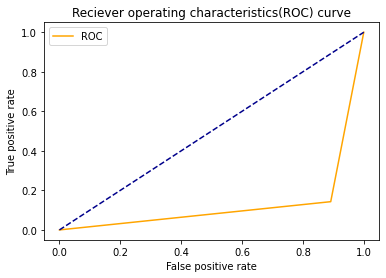

In [205]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics(ROC) curve')
plt.legend()
plt.show()
    
        

# AUC score

In [207]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score*100)

87.42643124665597


# Classification Report

In [208]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       266
           1       0.86      0.89      0.88       267

    accuracy                           0.87       533
   macro avg       0.87      0.87      0.87       533
weighted avg       0.87      0.87      0.87       533



# saving the model in pickel format

In [209]:
import joblib
joblib.dump(accuracy_score(y_test, pred)*100,"HR.pk1")

['HR.pk1']